
### Wine reviews dataset - pyspark ML

**Dataset url:**
https://www.kaggle.com/zynicide/wine-reviews

In [13]:
from pyspark.sql import SparkSession
from pyspark.sql import functions as F

import matplotlib.pyplot as plt
%matplotlib inline

In [14]:
#creating Spark session
spark = SparkSession.builder.appName('WineReviewsML').getOrCreate()

#changing configuration settings on Spark 
conf = spark.sparkContext._conf.setAll([('spark.executor.memory', '5g'), ('spark.app.name', 'Spark Updated Conf'), ('spark.executor.cores', '4'), ('spark.cores.max', '4'), ('spark.driver.memory','8g')])

spark.sparkContext.getConf().getAll()

[('spark.sql.warehouse.dir',
  'file:/Users/saiomkarkandukuri/Desktop/Academics/Academics-001/big-data-platforms/week-5/Session5/spark-warehouse'),
 ('spark.driver.port', '56782'),
 ('spark.executor.id', 'driver'),
 ('spark.executor.memory', '5g'),
 ('spark.app.submitTime', '1706475114391'),
 ('spark.executor.cores', '4'),
 ('spark.cores.max', '4'),
 ('spark.app.id', 'local-1706475115002'),
 ('spark.driver.extraJavaOptions',
  '-Djava.net.preferIPv6Addresses=false -XX:+IgnoreUnrecognizedVMOptions --add-opens=java.base/java.lang=ALL-UNNAMED --add-opens=java.base/java.lang.invoke=ALL-UNNAMED --add-opens=java.base/java.lang.reflect=ALL-UNNAMED --add-opens=java.base/java.io=ALL-UNNAMED --add-opens=java.base/java.net=ALL-UNNAMED --add-opens=java.base/java.nio=ALL-UNNAMED --add-opens=java.base/java.util=ALL-UNNAMED --add-opens=java.base/java.util.concurrent=ALL-UNNAMED --add-opens=java.base/java.util.concurrent.atomic=ALL-UNNAMED --add-opens=java.base/sun.nio.ch=ALL-UNNAMED --add-opens=java.

## Read Data

In [15]:
df = spark.read \
    .option("quote", "\"")  \
    .option("escape", "\"") \
    .option("ignoreLeadingWhiteSpace",True) \
    .csv("/Users/saiomkarkandukuri/Desktop/github/data-ml-ai/projects/pyspark/wine-reviews-appliedml/data/winemag-data_first150k.csv",inferSchema=True, header=True )



In [16]:
df.printSchema()

root
 |-- _c0: integer (nullable = true)
 |-- country: string (nullable = true)
 |-- description: string (nullable = true)
 |-- designation: string (nullable = true)
 |-- points: integer (nullable = true)
 |-- price: double (nullable = true)
 |-- province: string (nullable = true)
 |-- region_1: string (nullable = true)
 |-- region_2: string (nullable = true)
 |-- variety: string (nullable = true)
 |-- winery: string (nullable = true)



In [17]:
#loading second dataset with additional 130k reviews
df2 = spark.read \
    .option("quote", "\"")  \
    .option("escape", "\"") \
    .option("ignoreLeadingWhiteSpace",True) \
    .csv("/Users/saiomkarkandukuri/Desktop/github/data-ml-ai/projects/pyspark/wine-reviews-appliedml/data//winemag-data-130k-v2.csv",inferSchema=True, header=True )

In [18]:
df2.printSchema()

root
 |-- _c0: integer (nullable = true)
 |-- country: string (nullable = true)
 |-- description: string (nullable = true)
 |-- designation: string (nullable = true)
 |-- points: integer (nullable = true)
 |-- price: double (nullable = true)
 |-- province: string (nullable = true)
 |-- region_1: string (nullable = true)
 |-- region_2: string (nullable = true)
 |-- taster_name: string (nullable = true)
 |-- taster_twitter_handle: string (nullable = true)
 |-- title: string (nullable = true)
 |-- variety: string (nullable = true)
 |-- winery: string (nullable = true)



In [19]:
#combining the two datasets
df = df.union(df2.drop("taster_name", "taster_twitter_handle", "title"))

## Data Exploration

<b>Exercise</b>: <font color='red'>Complete the data exploration </font>

In [20]:

df.describe().show()

24/01/28 15:01:48 WARN SparkStringUtils: Truncated the string representation of a plan since it was too large. This behavior can be adjusted by setting 'spark.sql.debug.maxToStringFields'.
24/01/28 15:01:48 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: , country, description, designation, points, price, province, region_1, region_2, variety, winery
 Schema: _c0, country, description, designation, points, price, province, region_1, region_2, variety, winery
Expected: _c0 but found: 
CSV file: file:///Users/saiomkarkandukuri/Desktop/github/data-ml-ai/projects/pyspark/wine-reviews-appliedml/data/winemag-data_first150k.csv
24/01/28 15:01:49 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: , country, description, designation, points, price, province, region_1, region_2, variety, winery
 Schema: _c0, country, description, designation, points, price, province, region_1, region_2, variety, winery
Expected: _c0 but found: 
CSV file: file://

+-------+-----------------+-------+--------------------+------------------+------------------+------------------+--------+------------+-----------------+--------+-----------+
|summary|              _c0|country|         description|       designation|            points|             price|province|    region_1|         region_2| variety|     winery|
+-------+-----------------+-------+--------------------+------------------+------------------+------------------+--------+------------+-----------------+--------+-----------+
|  count|           280901| 280833|              280901|            197701|            280901|            258210|  280833|      234594|           111464|  280900|     280901|
|   mean|70615.70596046293|   NULL|                NULL|1265.2568195718654| 88.14693432917647|34.177161999922546|    NULL|        NULL|             NULL|    NULL|   Infinity|
| stddev|41214.37944527398|   NULL|                NULL| 5226.853375208442|3.1515282659639388|38.611708377270496|    NULL|   

In [22]:
df.count()

280901

In [24]:
df.show(10, truncate = False)

+---+-------+--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+------------------------------------+------+-----+--------------+------------------+-----------------+------------------+-----------------------+
|_c0|country|description                                                                                                                                                                                                                                                                                                                                                                                       |designation                         |points|price|prov

24/01/28 15:02:43 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: , country, description, designation, points, price, province, region_1, region_2, variety, winery
 Schema: _c0, country, description, designation, points, price, province, region_1, region_2, variety, winery
Expected: _c0 but found: 
CSV file: file:///Users/saiomkarkandukuri/Desktop/github/data-ml-ai/projects/pyspark/wine-reviews-appliedml/data/winemag-data_first150k.csv


In [25]:
#Count rows with missing values

df.dropna().count()

24/01/28 15:03:07 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: , country, description, designation, points, price, province, region_1, region_2, variety, winery
 Schema: _c0, country, description, designation, points, price, province, region_1, region_2, variety, winery
Expected: _c0 but found: 
CSV file: file:///Users/saiomkarkandukuri/Desktop/github/data-ml-ai/projects/pyspark/wine-reviews-appliedml/data/winemag-data_first150k.csv
24/01/28 15:03:07 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: , country, description, designation, points, price, province, region_1, region_2, variety, winery
 Schema: _c0, country, description, designation, points, price, province, region_1, region_2, variety, winery
Expected: _c0 but found: 
CSV file: file:///Users/saiomkarkandukuri/Desktop/github/data-ml-ai/projects/pyspark/wine-reviews-appliedml/data/winemag-data-130k-v2.csv


73325

In [26]:
#Missing values per each column

from pyspark.sql.functions import isnan, when, count, col
df.select([count(when(df[c].isNull(), c)).alias(c) for c in df.columns]).show()

24/01/28 15:03:42 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: , country, description, designation, points, price, province, region_1, region_2, variety, winery
 Schema: _c0, country, description, designation, points, price, province, region_1, region_2, variety, winery
Expected: _c0 but found: 
CSV file: file:///Users/saiomkarkandukuri/Desktop/github/data-ml-ai/projects/pyspark/wine-reviews-appliedml/data/winemag-data_first150k.csv
24/01/28 15:03:42 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: , country, description, designation, points, price, province, region_1, region_2, variety, winery
 Schema: _c0, country, description, designation, points, price, province, region_1, region_2, variety, winery
Expected: _c0 but found: 
CSV file: file:///Users/saiomkarkandukuri/Desktop/github/data-ml-ai/projects/pyspark/wine-reviews-appliedml/data/winemag-data-130k-v2.csv


+---+-------+-----------+-----------+------+-----+--------+--------+--------+-------+------+
|_c0|country|description|designation|points|price|province|region_1|region_2|variety|winery|
+---+-------+-----------+-----------+------+-----+--------+--------+--------+-------+------+
|  0|     68|          0|      83200|     0|22691|      68|   46307|  169437|      1|     0|
+---+-------+-----------+-----------+------+-----+--------+--------+--------+-------+------+



In [27]:
#dropping rows where country is missing

df = df.filter(df["country"].isNotNull())

In [28]:
#mean price

meanprice = df.agg({"price": "mean"}).collect()[0][0]
meanprice

34.17965802297925

In [29]:
#Imputing the value of price wherever it is missing to the mean price

df = df.na.fill(meanprice, "price") \
    .na.fill("Unknown", "region_1")

In [30]:
df.select([count(when(df[c].isNull(), c)).alias(c) for c in df.columns]).show()

24/01/28 15:06:25 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: , country, description, designation, points, province, region_2, variety, winery
 Schema: _c0, country, description, designation, points, province, region_2, variety, winery
Expected: _c0 but found: 
CSV file: file:///Users/saiomkarkandukuri/Desktop/github/data-ml-ai/projects/pyspark/wine-reviews-appliedml/data/winemag-data_first150k.csv
24/01/28 15:06:25 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: , country, description, designation, points, province, region_2, variety, winery
 Schema: _c0, country, description, designation, points, province, region_2, variety, winery
Expected: _c0 but found: 
CSV file: file:///Users/saiomkarkandukuri/Desktop/github/data-ml-ai/projects/pyspark/wine-reviews-appliedml/data/winemag-data-130k-v2.csv


+---+-------+-----------+-----------+------+-----+--------+--------+--------+-------+------+
|_c0|country|description|designation|points|price|province|region_1|region_2|variety|winery|
+---+-------+-----------+-----------+------+-----+--------+--------+--------+-------+------+
|  0|      0|          0|      83189|     0|    0|       0|       0|  169369|      1|     0|
+---+-------+-----------+-----------+------+-----+--------+--------+--------+-------+------+



In [33]:
#counting the number of countries

df.select('Country').distinct().count()

50

In [32]:
#counting wines by country

df.groupby('Country').count().orderBy(["count"], ascending=[0]).show()

+------------+------+
|     Country| count|
+------------+------+
|          US|116901|
|      France| 43191|
|       Italy| 43018|
|       Spain| 14913|
|    Portugal| 11013|
|       Chile| 10288|
|   Argentina|  9431|
|   Australia|  7286|
|     Austria|  6402|
| New Zealand|  4739|
|     Germany|  4617|
|South Africa|  3659|
|      Greece|  1350|
|      Israel|  1135|
|      Canada|   453|
|     Hungary|   377|
|     Romania|   259|
|    Bulgaria|   218|
|     Uruguay|   201|
|    Slovenia|   181|
+------------+------+
only showing top 20 rows



In [34]:
#Number of varieties

df.select('Variety').distinct().count()

751

In [36]:
#Number of wines by variety

df.groupby("variety").count().orderBy(["count"], ascending=[0]).show()

+--------------------+-----+
|             variety|count|
+--------------------+-----+
|          Pinot Noir|27557|
|          Chardonnay|26232|
|  Cabernet Sauvignon|22270|
|           Red Blend|18996|
|Bordeaux-style Re...|14262|
|     Sauvignon Blanc|11283|
|            Riesling|10712|
|               Syrah| 9967|
|              Merlot| 8171|
|           Zinfandel| 6513|
|                Rosé| 6380|
|          Sangiovese| 6052|
|              Malbec| 5860|
|         White Blend| 5178|
|            Nebbiolo| 5045|
|      Portuguese Red| 4682|
|         Tempranillo| 4365|
|     Sparkling Blend| 4157|
|Rhône-style Red B...| 2975|
|          Pinot Gris| 2817|
+--------------------+-----+
only showing top 20 rows



In [37]:
#Number of wines grouped and sorted by Country and Province

df.groupBy('Country', 'province').count().orderBy(["count"], ascending=[0]).show()

+---------+------------------+-----+
|  Country|          province|count|
+---------+------------------+-----+
|       US|        California|80755|
|       US|        Washington|18389|
|    Italy|           Tuscany|13178|
|   France|          Bordeaux|12052|
|       US|            Oregon| 9962|
|    Spain|    Northern Spain| 8743|
|   France|          Burgundy| 8288|
|Argentina|  Mendoza Province| 8006|
|    Italy|          Piedmont| 7822|
|    Italy|            Veneto| 6678|
|       US|          New York| 5116|
|Australia|   South Australia| 4353|
|    Italy| Sicily & Sardinia| 4342|
|   France|            Alsace| 4120|
|    Italy|Northeastern Italy| 4120|
|   France|      Loire Valley| 3642|
|   France|  Southwest France| 3104|
|   France|         Champagne| 2983|
|    Italy|    Southern Italy| 2788|
|    Italy|     Central Italy| 2763|
+---------+------------------+-----+
only showing top 20 rows



In [38]:
#Number of wines grouped and sorted by Country and Province and region - region_1

df.cube("Country", "province", "region_1").count().dropna().orderBy(["count"], ascending=[0]).show()


+-----------+-----------------+--------------------+-----+
|    Country|         province|            region_1|count|
+-----------+-----------------+--------------------+-----+
|         US|       California|         Napa Valley|10689|
|         US|       Washington|Columbia Valley (WA)| 9099|
|         US|       California|Russian River Valley| 6662|
|         US|       California|          California| 6091|
|  Argentina| Mendoza Province|             Mendoza| 5887|
|         US|       California|         Paso Robles| 5403|
|         US|           Oregon|   Willamette Valley| 4397|
|     France|           Alsace|              Alsace| 3737|
|      Spain|   Northern Spain|               Rioja| 3362|
|      Italy|          Tuscany|Brunello di Monta...| 3216|
|         US|       California|       Sonoma County| 3099|
|      Italy|          Tuscany|             Toscana| 3082|
|      Italy|         Piedmont|              Barolo| 2997|
|     France|        Champagne|           Champagne| 298

In [39]:
#Minumum, Maximum and Average price in each country

df.groupBy('Country').agg(F.min('price'),F.max('price'),F.avg('price')).orderBy(["max(price)"], ascending=[0]).show()

+------------+----------+----------+------------------+
|     Country|min(price)|max(price)|        avg(price)|
+------------+----------+----------+------------------+
|      France|       5.0|    3300.0|  40.9601251368177|
|          US|       4.0|    2013.0| 35.01133685800309|
|     Austria|       7.0|    1100.0| 31.52705669880294|
|    Portugal|       4.0|    1000.0|27.679968132305852|
|       Italy|       5.0|     900.0|37.806687822033155|
|   Australia|       5.0|     850.0|   32.613588592678|
|     Germany|       5.0|     775.0| 40.34480153854167|
|       Spain|       4.0|     770.0| 27.64885257454141|
|     Hungary|       7.0|     764.0| 42.78344646166036|
|       Chile|       5.0|     400.0| 20.11645059782618|
|South Africa|       5.0|     330.0|22.840988216716134|
|     Romania|       4.0|     320.0| 15.86100386100386|
|   Argentina|       4.0|     250.0|22.399407263919215|
| Switzerland|      19.0|     160.0| 63.90909090909091|
|      Israel|       8.0|     150.0|31.596006774

In [40]:
#Lets try deriving the Highest rated wine, but by using pyspark API 

from pyspark.sql.functions import max
df.agg(max(df.points)).head()[0]

100

In [41]:
#average points ranked by country

df2 = df.groupBy('Country').agg(F.min('points'),F.max('points'),F.avg('points')).orderBy(["avg(points)"], ascending=[0])

df2.show()

+-----------+-----------+-----------+-----------------+
|    Country|min(points)|max(points)|      avg(points)|
+-----------+-----------+-----------+-----------------+
|    England|         89|         95|91.72289156626506|
|    Austria|         81|         98|89.70759137769447|
|    Germany|         80|         98|89.20099631795539|
|      India|         82|         93|             89.0|
|     France|         80|        100|  88.884559283184|
|     Canada|         82|         94|88.88079470198676|
|      Italy|         80|        100|88.48114742665861|
|    Morocco|         82|         93|            88.45|
|         US|         80|        100|88.16610636350416|
|   Portugal|         80|        100|88.15717788068646|
|   Slovenia|         82|         92|88.15469613259668|
|  Australia|         80|        100|88.11240735657425|
|     Turkey|         84|         92|88.09154929577464|
|Switzerland|         83|         90| 88.0909090909091|
|    Hungary|         80|         97|88.05039787

In [42]:
#converting Pyspark dataframe to Pandas dataframe for plotting

pandas_df = df2.toPandas()

<Axes: xlabel='Country'>

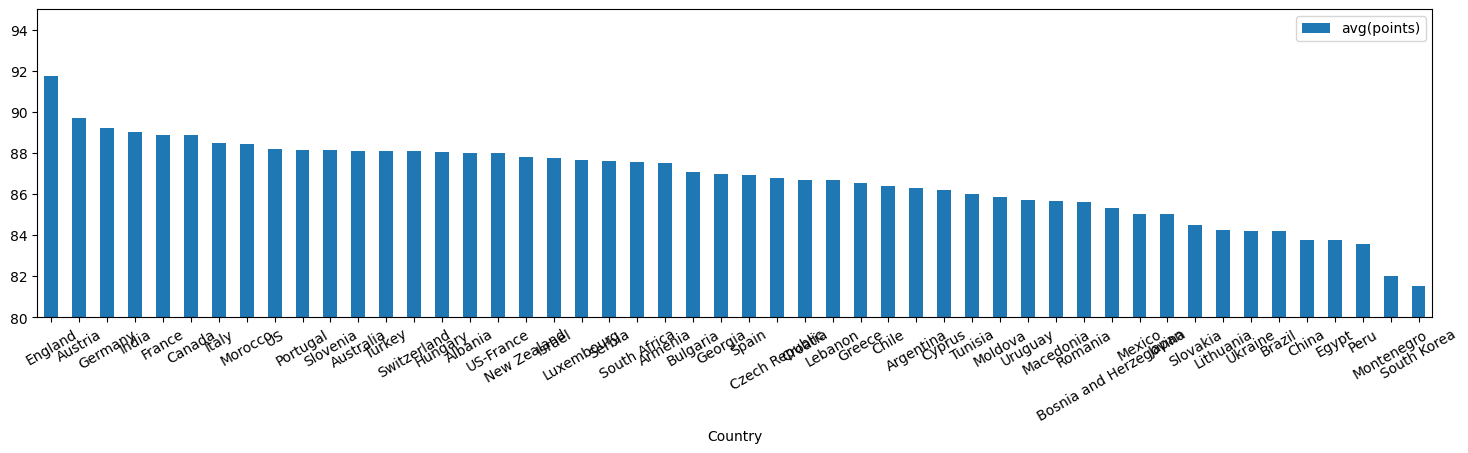

In [43]:
pandas_df.plot(kind= 'bar', x='Country', y='avg(points)', figsize=(18,4), rot=30, ylim=(80, 95))

##  Feature Engineering

In [44]:
from pyspark.ml.linalg import Vectors
from pyspark.ml.stat import Correlation

In [45]:
#Any correlation between the points and price ?
df.stat.corr("points", "price")



0.42001120970067274

Looks like weak relationship between points and price

In [46]:
min_price = df.agg({"price": "min"}).collect()[0][0]
max_price = df.agg({"price": "max"}).collect()[0][0]
mean_price = df.agg({"price": "mean"}).collect()[0][0]

print ("Minimum Price : ", min_price, ", Maximum Price : ", max_price, ", Mean Price : ", mean_price)

Minimum Price :  4.0 , Maximum Price :  3300.0 , Mean Price :  34.179658022979204


In [47]:
#Normalizing the price, min-max normalization

df = df.withColumn('price_norm', (df["price"] - min_price)/ ( max_price  - min_price))

df.show(2)

+---+-------+--------------------+--------------------+------+-----+--------------+-----------+--------+------------------+--------------------+-------------------+
|_c0|country|         description|         designation|points|price|      province|   region_1|region_2|           variety|              winery|         price_norm|
+---+-------+--------------------+--------------------+------+-----+--------------+-----------+--------+------------------+--------------------+-------------------+
|  0|     US|This tremendous 1...|   Martha's Vineyard|    96|235.0|    California|Napa Valley|    Napa|Cabernet Sauvignon|               Heitz|0.07008495145631068|
|  1|  Spain|Ripe aromas of fi...|Carodorum Selecci...|    96|110.0|Northern Spain|       Toro|    NULL|     Tinta de Toro|Bodega Carmen Rod...|0.03216019417475728|
+---+-------+--------------------+--------------------+------+-----+--------------+-----------+--------+------------------+--------------------+-------------------+
only showi

24/01/28 15:18:34 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: , country, description, designation, points, price, province, region_1, region_2, variety, winery
 Schema: _c0, country, description, designation, points, price, province, region_1, region_2, variety, winery
Expected: _c0 but found: 
CSV file: file:///Users/saiomkarkandukuri/Desktop/github/data-ml-ai/projects/pyspark/wine-reviews-appliedml/data/winemag-data_first150k.csv


Quantile Discretizer


[QuantileDiscretizer](https://spark.apache.org/docs/latest/ml-features.html#quantilediscretizer) takes a column with continuous features and outputs a column with binned categorical features. The number of bins is set by the numBuckets parameter. It is possible that the number of buckets used will be smaller than this value, for example, if there are too few distinct values of the input to create enough distinct quantiles.

In [48]:
from pyspark.ml.feature import QuantileDiscretizer

#Creating three buckets as High, Medium and Low

discretizer = QuantileDiscretizer(numBuckets=3, inputCol="price", outputCol="price_category")

df = discretizer.fit(df).transform(df)

df.show(3)

+---+-------+--------------------+--------------------+------+-----+--------------+--------------+--------+------------------+--------------------+--------------------+--------------+
|_c0|country|         description|         designation|points|price|      province|      region_1|region_2|           variety|              winery|          price_norm|price_category|
+---+-------+--------------------+--------------------+------+-----+--------------+--------------+--------+------------------+--------------------+--------------------+--------------+
|  0|     US|This tremendous 1...|   Martha's Vineyard|    96|235.0|    California|   Napa Valley|    Napa|Cabernet Sauvignon|               Heitz| 0.07008495145631068|           2.0|
|  1|  Spain|Ripe aromas of fi...|Carodorum Selecci...|    96|110.0|Northern Spain|          Toro|    NULL|     Tinta de Toro|Bodega Carmen Rod...| 0.03216019417475728|           2.0|
|  2|     US|Mac Watson honors...|Special Selected ...|    96| 90.0|    Californ

24/01/28 15:19:59 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: , country, description, designation, points, price, province, region_1, region_2, variety, winery
 Schema: _c0, country, description, designation, points, price, province, region_1, region_2, variety, winery
Expected: _c0 but found: 
CSV file: file:///Users/saiomkarkandukuri/Desktop/github/data-ml-ai/projects/pyspark/wine-reviews-appliedml/data/winemag-data_first150k.csv


In [51]:
#Showing the class distribution of price_category

df.groupby("price_category").count().toPandas()

,price_category,count
0,0.0,90335
1,1.0,79988
2,2.0,110510


In [52]:
# Lets apply the QuantileDiscretizer() for points column as well

discretizer = QuantileDiscretizer(numBuckets=3, inputCol="points", outputCol="points_category")

df = discretizer.fit(df).transform(df)

df.show(3)

+---+-------+--------------------+--------------------+------+-----+--------------+--------------+--------+------------------+--------------------+--------------------+--------------+---------------+
|_c0|country|         description|         designation|points|price|      province|      region_1|region_2|           variety|              winery|          price_norm|price_category|points_category|
+---+-------+--------------------+--------------------+------+-----+--------------+--------------+--------+------------------+--------------------+--------------------+--------------+---------------+
|  0|     US|This tremendous 1...|   Martha's Vineyard|    96|235.0|    California|   Napa Valley|    Napa|Cabernet Sauvignon|               Heitz| 0.07008495145631068|           2.0|            2.0|
|  1|  Spain|Ripe aromas of fi...|Carodorum Selecci...|    96|110.0|Northern Spain|          Toro|    NULL|     Tinta de Toro|Bodega Carmen Rod...| 0.03216019417475728|           2.0|            2.0|


24/01/28 15:21:42 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: , country, description, designation, points, price, province, region_1, region_2, variety, winery
 Schema: _c0, country, description, designation, points, price, province, region_1, region_2, variety, winery
Expected: _c0 but found: 
CSV file: file:///Users/saiomkarkandukuri/Desktop/github/data-ml-ai/projects/pyspark/wine-reviews-appliedml/data/winemag-data_first150k.csv


### One Hot Encoding

In [53]:
from pyspark.ml.feature import VectorAssembler

from pyspark.ml import Pipeline
from pyspark.ml.feature import StringIndexer, OneHotEncoder

#Converting relevant categorical into one hot encoded
indexer1 = StringIndexer(inputCol="country", outputCol="countryIdx").setHandleInvalid("skip")
indexer2 = StringIndexer(inputCol="province", outputCol="provinceIdx").setHandleInvalid("skip")
indexer3 = StringIndexer(inputCol="variety", outputCol="varietyIdx").setHandleInvalid("skip")
indexer4 = StringIndexer(inputCol="winery", outputCol="wineryIdx").setHandleInvalid("skip")



In [54]:
#Gathering all indexers as inputs to the One Hot Encoder
inputs = [indexer1.getOutputCol(), indexer2.getOutputCol(), \
          indexer3.getOutputCol(), indexer4.getOutputCol()]



In [55]:
#Creating the one hot encoder
encoder = OneHotEncoder(inputCols=inputs,  \
                                 outputCols=["countryVec", "provinceVec", \
                                             "varietyVec", "wineryVec"])

#Runing it through a pipeline
pipeline = Pipeline(stages=[indexer1, indexer2, indexer3, indexer4, encoder])
encodedData = pipeline.fit(df).transform(df)



In [56]:
#We dropped all NAs, so we don't need to impute missing values
#pipeline = pipeline.na.fill(0) 

encodedData.show(5)

+---+-------+--------------------+--------------------+------+-----+--------------+-----------------+-----------------+------------------+--------------------+--------------------+--------------+---------------+----------+-----------+----------+---------+--------------+----------------+-----------------+--------------------+
|_c0|country|         description|         designation|points|price|      province|         region_1|         region_2|           variety|              winery|          price_norm|price_category|points_category|countryIdx|provinceIdx|varietyIdx|wineryIdx|    countryVec|     provinceVec|       varietyVec|           wineryVec|
+---+-------+--------------------+--------------------+------+-----+--------------+-----------------+-----------------+------------------+--------------------+--------------------+--------------+---------------+----------+-----------+----------+---------+--------------+----------------+-----------------+--------------------+
|  0|     US|This t

24/01/28 15:24:18 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: , country, description, designation, points, price, province, region_1, region_2, variety, winery
 Schema: _c0, country, description, designation, points, price, province, region_1, region_2, variety, winery
Expected: _c0 but found: 
CSV file: file:///Users/saiomkarkandukuri/Desktop/github/data-ml-ai/projects/pyspark/wine-reviews-appliedml/data/winemag-data_first150k.csv


In [57]:
#Gathering feature vector and identifying features

assembler = VectorAssembler(inputCols = ['countryVec', 'provinceVec', \
                                         'varietyVec', 'wineryVec', 'points'], \
                            outputCol = 'features')

encodedData = assembler.transform(encodedData)

In [58]:
encodedData.show(2)

+---+-------+--------------------+--------------------+------+-----+--------------+-----------+--------+------------------+--------------------+-------------------+--------------+---------------+----------+-----------+----------+---------+--------------+---------------+----------------+--------------------+--------------------+
|_c0|country|         description|         designation|points|price|      province|   region_1|region_2|           variety|              winery|         price_norm|price_category|points_category|countryIdx|provinceIdx|varietyIdx|wineryIdx|    countryVec|    provinceVec|      varietyVec|           wineryVec|            features|
+---+-------+--------------------+--------------------+------+-----+--------------+-----------+--------+------------------+--------------------+-------------------+--------------+---------------+----------+-----------+----------+---------+--------------+---------------+----------------+--------------------+--------------------+
|  0|     

24/01/28 15:25:03 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: , country, description, designation, points, price, province, region_1, region_2, variety, winery
 Schema: _c0, country, description, designation, points, price, province, region_1, region_2, variety, winery
Expected: _c0 but found: 
CSV file: file:///Users/saiomkarkandukuri/Desktop/github/data-ml-ai/projects/pyspark/wine-reviews-appliedml/data/winemag-data_first150k.csv


In [59]:
#Split data into train and test

encodedData = encodedData.drop("_c0")
train_df, test_df = encodedData.randomSplit([.8,.2],seed=1234)
train_df.show(1)

24/01/28 15:26:06 WARN DAGScheduler: Broadcasting large task binary with size 3.1 MiB


+-------+--------------------+-----------+------+-----+--------+--------+--------+-------+------+--------------------+--------------+---------------+----------+-----------+----------+---------+---------------+-----------------+-----------------+--------------------+--------------------+
|country|         description|designation|points|price|province|region_1|region_2|variety|winery|          price_norm|price_category|points_category|countryIdx|provinceIdx|varietyIdx|wineryIdx|     countryVec|      provinceVec|       varietyVec|           wineryVec|            features|
+-------+--------------------+-----------+------+-----+--------+--------+--------+-------+------+--------------------+--------------+---------------+----------+-----------+----------+---------+---------------+-----------------+-----------------+--------------------+--------------------+
|Albania|This garnet-color...|       NULL|    88| 20.0| Mirditë| Unknown|    NULL|Kallmet|Arbëri|0.004854368932038...|           1.0|   

##  Regression

Let us try to predict the price given features such as country, variety, region, etc.

### Linear Regression

In [63]:

## Using Elastic net to address the limitations in LASSO regularizationm


from pyspark.ml.regression import LinearRegression

#Elastic Net
lr = LinearRegression(featuresCol = 'features', labelCol='price', regParam=0.3, elasticNetParam=0.8, maxIter=10)
lrm = lr.fit(train_df)



24/01/28 15:28:49 WARN DAGScheduler: Broadcasting large task binary with size 3.1 MiB
24/01/28 15:28:51 WARN DAGScheduler: Broadcasting large task binary with size 3.1 MiB
24/01/28 15:28:52 WARN InstanceBuilder: Failed to load implementation from:dev.ludovic.netlib.blas.JNIBLAS
24/01/28 15:28:52 WARN DAGScheduler: Broadcasting large task binary with size 3.1 MiB
24/01/28 15:28:54 WARN DAGScheduler: Broadcasting large task binary with size 3.1 MiB
24/01/28 15:28:55 WARN DAGScheduler: Broadcasting large task binary with size 3.1 MiB
24/01/28 15:28:56 WARN DAGScheduler: Broadcasting large task binary with size 3.1 MiB
24/01/28 15:28:57 WARN DAGScheduler: Broadcasting large task binary with size 3.1 MiB
24/01/28 15:28:57 WARN DAGScheduler: Broadcasting large task binary with size 3.1 MiB
24/01/28 15:28:58 WARN DAGScheduler: Broadcasting large task binary with size 3.1 MiB
24/01/28 15:28:58 WARN DAGScheduler: Broadcasting large task binary with size 3.1 MiB
24/01/28 15:28:58 WARN DAGSchedul

In [64]:
print("Coefficients: " + str(lrm.coefficients))
print("Intercept: " + str(lrm.intercept))

print("RMSE: %f" % lrm.summary.rootMeanSquaredError)
print("r2: %f" % lrm.summary.r2)



Coefficients: (20462,[0,2,4,5,6,8,10,11,17,49,50,51,52,54,55,56,58,65,66,70,71,74,77,80,84,98,103,106,132,143,154,176,313,335,341,459,538,539,540,541,542,543,544,545,546,548,549,551,552,553,554,557,558,559,561,562,564,565,566,567,569,570,572,574,578,579,588,589,594,600,602,621,625,634,636,639,653,669,672,695,721,1089,1228,1265,1276,1289,1294,1295,1296,1298,1300,1301,1304,1310,1313,1318,1320,1321,1331,1333,1342,1353,1365,1370,1387,1389,1396,1397,1402,1405,1406,1407,1412,1413,1418,1423,1425,1426,1430,1431,1442,1450,1451,1452,1467,1470,1487,1501,1517,1548,1552,1557,1558,1567,1571,1581,1586,1597,1605,1606,1608,1609,1613,1616,1627,1634,1636,1640,1642,1670,1673,1683,1687,1691,1693,1702,1718,1724,1732,1734,1735,1739,1740,1753,1758,1778,1779,1781,1791,1815,1842,1850,1861,1873,1881,1892,1945,1948,1954,1958,1960,1962,1967,1970,1973,1980,1981,1985,1998,2000,2005,2012,2016,2025,2061,2062,2073,2079,2084,2091,2094,2099,2101,2104,2107,2112,2117,2128,2141,2149,2157,2172,2184,2186,2213,2218,2223,2235,2

In [65]:
#make predictions

predictions = lrm.transform(test_df)

In [66]:
#RegressionEvaluator

from itertools import chain

attrs = sorted(
    (attr["idx"], attr["name"]) for attr in (chain(*predictions
        .schema[lrm.summary.featuresCol]
        .metadata["ml_attr"]["attrs"].values())))

In [67]:
from pyspark.ml.evaluation import RegressionEvaluator

eval = RegressionEvaluator(labelCol="price", predictionCol="prediction", metricName="rmse")

# Root Mean Square Error
rmse = eval.evaluate(predictions)
print("RMSE: %.3f" % rmse)

# Mean Square Error
mse = eval.evaluate(predictions, {eval.metricName: "mse"})
print("MSE: %.3f" % mse)

# Mean Absolute Error
mae = eval.evaluate(predictions, {eval.metricName: "mae"})
print("MAE: %.3f" % mae)

# r2 - coefficient of determination
r2 = eval.evaluate(predictions, {eval.metricName: "r2"})
print("r2: %.3f" %r2)

24/01/28 15:30:21 WARN DAGScheduler: Broadcasting large task binary with size 3.1 MiB
24/01/28 15:30:22 WARN DAGScheduler: Broadcasting large task binary with size 3.1 MiB


RMSE: 30.401


24/01/28 15:30:22 WARN DAGScheduler: Broadcasting large task binary with size 3.1 MiB
24/01/28 15:30:23 WARN DAGScheduler: Broadcasting large task binary with size 3.1 MiB


MSE: 924.246


24/01/28 15:30:23 WARN DAGScheduler: Broadcasting large task binary with size 3.1 MiB
24/01/28 15:30:24 WARN DAGScheduler: Broadcasting large task binary with size 3.1 MiB
24/01/28 15:30:24 WARN DAGScheduler: Broadcasting large task binary with size 3.1 MiB


MAE: 13.754


r2: 0.363


24/01/28 15:30:25 WARN DAGScheduler: Broadcasting large task binary with size 3.1 MiB


In [68]:
#Viewing the predictions against test

predictions.select("country", "region_1", "winery", "variety", "points", "price", "prediction"). \
orderBy(["country", "region_1", "winery", "variety", "points", "price", "prediction"]).show(20)

24/01/28 15:30:56 WARN DAGScheduler: Broadcasting large task binary with size 3.1 MiB


+---------+--------+-------------------+--------------------+------+-----+------------------+
|  country|region_1|             winery|             variety|points|price|        prediction|
+---------+--------+-------------------+--------------------+------+-----+------------------+
|  Albania| Unknown|             Arbëri|             Kallmet|    88| 20.0|27.994404587579936|
|Argentina|  Agrelo|Bodegas Escorihuela|Cabernet Sauvigno...|    86| 10.0|21.542332464637013|
|Argentina|  Agrelo|       Cabra Montes|              Merlot|    85|  9.0|16.723700852933575|
|Argentina|  Agrelo|              Cadus|  Cabernet Sauvignon|    88| 20.0|37.881169251129734|
|Argentina|  Agrelo|           Casarena|              Malbec|    89| 40.0| 31.41510882537841|
|Argentina|  Agrelo|       Finca Decero|  Cabernet Sauvignon|    84| 20.0|22.481778858543066|
|Argentina|  Agrelo|       Finca Decero|  Cabernet Sauvignon|    85| 21.0| 26.33162645668972|
|Argentina|  Agrelo|       Finca Decero|              Malbec

Well, the model doesnt look good. Let's tune the model hyperparameters, and see if adding additional attributes from the dataset improves the model

## Classification

Let us try to predict the price_category given features such as country, variety, region, etc.

### Logistic Regression

In [69]:
#Training a logistic regression model

#%%time

from pyspark.ml.classification import LogisticRegression

# Setting parameters for Logistic Regression
lgr = LogisticRegression(maxIter=10, featuresCol = 'features', labelCol='price_category')

# Fitting the model to the data.
lgrm = lgr.fit(train_df)

predictions = lgrm.transform(test_df)

24/01/28 15:33:04 WARN DAGScheduler: Broadcasting large task binary with size 3.1 MiB
24/01/28 15:33:06 WARN DAGScheduler: Broadcasting large task binary with size 3.1 MiB
24/01/28 15:33:06 WARN DAGScheduler: Broadcasting large task binary with size 3.1 MiB
24/01/28 15:33:08 WARN DAGScheduler: Broadcasting large task binary with size 3.1 MiB
24/01/28 15:33:08 WARN DAGScheduler: Broadcasting large task binary with size 3.1 MiB
24/01/28 15:33:09 WARN DAGScheduler: Broadcasting large task binary with size 3.1 MiB
24/01/28 15:33:09 WARN DAGScheduler: Broadcasting large task binary with size 3.1 MiB
24/01/28 15:33:10 WARN DAGScheduler: Broadcasting large task binary with size 3.1 MiB
24/01/28 15:33:10 WARN DAGScheduler: Broadcasting large task binary with size 3.1 MiB
24/01/28 15:33:11 WARN DAGScheduler: Broadcasting large task binary with size 3.1 MiB
24/01/28 15:33:11 WARN DAGScheduler: Broadcasting large task binary with size 3.1 MiB
24/01/28 15:33:12 WARN DAGScheduler: Broadcasting larg

In [70]:
#compare predictions against true labels

predictions.select("country", "region_1", "winery", "variety", "points", "price_category", "prediction").show(20)

24/01/28 15:33:21 WARN DAGScheduler: Broadcasting large task binary with size 3.6 MiB


+---------+----------------+--------------------+------------------+------+--------------+----------+
|  country|        region_1|              winery|           variety|points|price_category|prediction|
+---------+----------------+--------------------+------------------+------+--------------+----------+
|  Albania|         Unknown|              Arbëri|           Kallmet|    88|           1.0|       1.0|
|Argentina|Calchaquí Valley|              Colomé|         Red Blend|    85|           0.0|       1.0|
|Argentina|         Mendoza|       Bodega Norton|Cabernet Sauvignon|    84|           0.0|       0.0|
|Argentina|         Mendoza|             Lagarde|Cabernet Sauvignon|    85|           0.0|       0.0|
|Argentina|   Luján de Cuyo|      Bodega Goulart|         Torrontés|    84|           0.0|       0.0|
|Argentina|         Mendoza|             Sottano|Cabernet Sauvignon|    89|           1.0|       1.0|
|Argentina|         Mendoza|     Finca la Malena|         Torrontés|    86|       

In [71]:
#evaluation metrics


from pyspark.ml.evaluation import MulticlassClassificationEvaluator

evaluator = MulticlassClassificationEvaluator(labelCol="price_category", predictionCol="prediction")

print(evaluator.evaluate(predictions, {evaluator.metricName: "accuracy"}))
print(evaluator.evaluate(predictions, {evaluator.metricName: "f1"}))

24/01/28 15:33:45 WARN DAGScheduler: Broadcasting large task binary with size 3.6 MiB


0.7517628205128205


24/01/28 15:33:46 WARN DAGScheduler: Broadcasting large task binary with size 3.6 MiB


0.7497019040227961


The evaluation metrics for logistic classification model reveal a moderate level of performance. With an accuracy of 75.18%, the model correctly predicted the wine categories for a significant portion of instances. The F1 score, balancing precision and recall, is 74.97%, indicating a reasonable trade-off between these two metrics. These results suggest that the model is effective but may benefit from further optimization. 


The warning messages are not related to the evaluation metrics. These warnings are common in Apache Spark when large objects need to be sent to worker nodes during distributed computations. They typically don't affect the evaluation results but might indicate that there's a need to optimize certain operations for better performance, especially in a distributed computing environment.

### Random Forest

In [72]:

#%%time
from pyspark.ml.classification import RandomForestClassifier

# Set parameters for the Random Forest.
rfc = RandomForestClassifier(maxDepth=5, numTrees=15, impurity="gini", labelCol="price_category", predictionCol="prediction")

# Fit the model to the data.
rfcm = rfc.fit(train_df)

predictions = rfcm.transform(test_df)

24/01/28 15:37:48 WARN DAGScheduler: Broadcasting large task binary with size 3.1 MiB
24/01/28 15:37:48 WARN DAGScheduler: Broadcasting large task binary with size 3.1 MiB
24/01/28 15:37:49 WARN DAGScheduler: Broadcasting large task binary with size 3.1 MiB
24/01/28 15:37:51 WARN DAGScheduler: Broadcasting large task binary with size 3.8 MiB
24/01/28 15:37:55 WARN MemoryStore: Not enough space to cache rdd_835_7 in memory! (computed 21.3 MiB so far)
24/01/28 15:37:55 WARN MemoryStore: Not enough space to cache rdd_835_2 in memory! (computed 21.3 MiB so far)
24/01/28 15:37:55 WARN MemoryStore: Not enough space to cache rdd_835_1 in memory! (computed 32.8 MiB so far)
24/01/28 15:37:55 WARN MemoryStore: Not enough space to cache rdd_835_4 in memory! (computed 32.8 MiB so far)
24/01/28 15:37:55 WARN MemoryStore: Not enough space to cache rdd_835_0 in memory! (computed 21.3 MiB so far)
24/01/28 15:37:55 WARN MemoryStore: Not enough space to cache rdd_835_6 in memory! (computed 13.8 MiB so f

Probably not a very good decision to run it on local machine. Anyways, evaluation metrics below.

In [73]:
#Evaluation metrics for random forest model

print(evaluator.evaluate(predictions, {evaluator.metricName: "accuracy"}))
print(evaluator.evaluate(predictions, {evaluator.metricName: "f1"}))

24/01/28 15:41:55 WARN DAGScheduler: Broadcasting large task binary with size 3.2 MiB


0.40532407407407406


24/01/28 15:41:56 WARN DAGScheduler: Broadcasting large task binary with size 3.2 MiB


0.24987234321435087


The evaluation metrics for the random forest model suggest a relatively poor performance. With an accuracy of 40.53%, the model correctly predicted the wine categories for only about 40.53% of the instances, indicating a substantial room for improvement. The F1 score, at 24.99%, further underscores the challenges faced by the model in achieving a balance between precision and recall. A low F1 score typically implies that the model struggles with both false positives and false negatives, making it less effective in classifying instances accurately. These results  indicate that the random forest model, as currently configured, is not the most suitable algorithm. Further model tuning, feature engineering, or exploration of alternative algorithms could be considered to enhance predictive performance on the wine reviews dataset. 


FOllowing ideas can be considered
1. Tune the model hyperparameters - increase number of trees to see if the model improves.
2. Implement a different classifier from Spark ML and compare metrics
3. Building a feature importance selector - Example



display(HTML("""<a href="https://www.timlrx.com/blog/feature-selection-using-feature-importance-score-creating-a-pyspark-estimator">text</a>"""))

In [81]:
#from IPython.core.display import display, HTML
#display(HTML("""<a href="https://www.timlrx.com/blog/feature-selection-using-feature-importance-score-creating-a-pyspark-estimator">text</a>"""))

FOllowing ideas can be considered
 1. Tune the model hyperparameters - increase number of trees to see if the model improves.
 2. Implement a different classifier from Spark ML and compare metrics
 3. Building a feature importance selector

In [82]:

%%html

<a href="https://www.timlrx.com/blog/feature-selection-using-feature-importance-score-creating-a-pyspark-estimator">Sample Feature importance selector</a>